**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from scipy.spatial import distance
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute', classes=3):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.classes = classes

    def fit(self, X, y):
        self.X = X.astype(dtype='float64')
        self.y = y.astype(dtype='int32')
        self.classes = np.unique(y).shape[0]

    def distance(self, X, p=2):
        return np.sum(np.absolute(X - self.X) ** p, axis=1) ** (1 / p)

    def eucl(self, X):
        return distance.cdist(X, self.X, 'euclidean')

    def predict(self, X):
        if self.algorithm == 'brute':
            n_samples = X.shape[0]
            prediction = np.zeros(n_samples, dtype='int32')
            dist = self.eucl(X)
            clusters = self.y[np.argsort(dist, axis=1)[:, :self.n_neighbors]]
            for i in range(n_samples):
                values = np.bincount(clusters[i, :])
                prediction[i] = np.argmax(values)
            return prediction

        if self.algorithm == 'kd_tree':
            n_samples = X.shape[0]
            prediction = np.zeros(n_samples, dtype='int32')
            tree = KDTree(self.X)
            dist, ind = tree.query(X, k=self.n_neighbors)
            clusters = self.y[ind]
            for i in range(n_samples):
                values = np.bincount(clusters[i, :])
                prediction[i] = np.argmax(values)
            return prediction

    def predict_proba(self, X):
        n_samples = X.shape[0]
        proba = np.zeros((n_samples, self.classes))
        dist = self.eucl(X)
        clusters = self.y[np.argsort(dist, axis=1)[:, :self.n_neighbors]]
        for i in range(n_samples):
            values = np.bincount(clusters[i, :])
            proba[i][:values.shape[0]] += values / self.n_neighbors
        return proba

    def score(self, X, y):
        y = y.astype(dtype='int32')
        prediction = self.predict(X)
        n_samples = prediction.shape[0]
        err = 0
        for i in range(n_samples):
            if (prediction[i] != y[i]):
                err += 1
        return 1 - err / n_samples



**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
my_clf 

MyKNeighborsClassifier(algorithm='brute', classes=3, n_neighbors=2)

In [7]:
%time clf.fit(X_train, y_train)

Wall time: 997 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [8]:
%time my_clf.fit(X_train, y_train)

Wall time: 998 µs


In [9]:
%time clf.predict(X_test)

Wall time: 4.99 ms


array([0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1])

In [10]:
%time my_clf.predict(X_test)

Wall time: 998 µs


array([0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1])

In [11]:
%time clf.predict_proba(X_test)

Wall time: 1.99 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [12]:
%time my_clf.predict_proba(X_test)

Wall time: 0 ns


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [13]:
clf.score(X_test, y_test)

0.9333333333333333

In [14]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

11


Text(0.5, 0, 'n_neighbors')

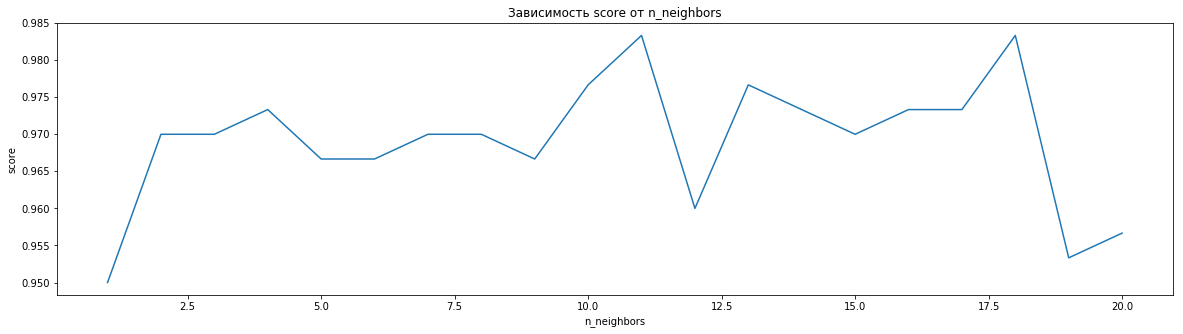

In [15]:
N = 20
Y = np.zeros(N)
X = np.arange(1, N+1)
for i in X:
    for j in range(N):
        X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                            iris.target,
                                                            test_size=0.1,
                                                            stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        Y[i - 1] += my_clf.score(X_test, y_test)
Y /= N
new_nn = np.argmax(Y) + 1
print(new_nn)
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot(111) 
sns.lineplot(x=X, y=Y)
ax.set_title('Зависимость score от n_neighbors')
ax.set_ylabel('score')
ax.set_xlabel('n_neighbors')

**MNIST**

In [16]:
mnist = fetch_openml('mnist_784', cache=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data,
                                                    mnist.target,
                                                    test_size=0.01,
                                                    stratify=mnist.target)

In [18]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [19]:
%time clf.fit(X_train, y_train)

Wall time: 210 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [20]:
%time my_clf.fit(X_train, y_train)

Wall time: 139 ms


In [21]:
%time clf.predict(X_test)

Wall time: 1.56 s


array(['2', '9', '4', '4', '9', '9', '7', '7', '6', '0', '6', '4', '2',
       '2', '1', '7', '1', '3', '5', '0', '8', '4', '1', '0', '3', '8',
       '7', '8', '9', '9', '9', '3', '1', '0', '7', '3', '0', '0', '1',
       '6', '8', '5', '2', '2', '3', '1', '4', '7', '7', '4', '1', '1',
       '2', '7', '1', '2', '7', '8', '8', '0', '8', '9', '4', '9', '6',
       '1', '4', '9', '7', '2', '5', '8', '8', '5', '7', '7', '1', '4',
       '2', '4', '2', '6', '2', '8', '2', '9', '8', '0', '0', '1', '6',
       '5', '4', '7', '7', '1', '5', '6', '1', '1', '0', '2', '6', '8',
       '4', '9', '5', '8', '1', '2', '6', '2', '0', '1', '0', '0', '0',
       '4', '4', '0', '9', '7', '7', '1', '3', '6', '3', '9', '7', '7',
       '6', '4', '7', '6', '7', '1', '1', '0', '3', '2', '1', '3', '4',
       '2', '3', '5', '3', '6', '8', '3', '9', '5', '0', '4', '9', '9',
       '1', '0', '2', '1', '9', '0', '9', '6', '4', '9', '4', '3', '5',
       '8', '8', '6', '9', '4', '1', '4', '4', '7', '8', '0', '0

In [22]:
%time my_clf.predict(X_test)

Wall time: 47 s


array([2, 9, 4, 4, 9, 9, 7, 7, 6, 0, 6, 4, 2, 2, 1, 7, 1, 3, 5, 0, 8, 4,
       1, 0, 3, 8, 7, 8, 9, 9, 9, 3, 1, 0, 7, 3, 0, 0, 1, 6, 8, 5, 2, 2,
       3, 1, 4, 7, 7, 4, 1, 1, 2, 7, 1, 2, 7, 8, 8, 0, 8, 9, 4, 9, 6, 1,
       4, 9, 7, 2, 5, 8, 8, 5, 7, 7, 1, 4, 2, 4, 2, 6, 2, 8, 2, 9, 8, 0,
       0, 1, 6, 5, 4, 7, 7, 1, 5, 6, 1, 1, 0, 2, 6, 8, 4, 9, 5, 8, 1, 2,
       6, 2, 0, 1, 0, 0, 0, 4, 4, 0, 9, 7, 7, 1, 3, 6, 3, 9, 7, 7, 6, 4,
       7, 6, 7, 1, 1, 0, 3, 2, 1, 3, 4, 2, 3, 5, 3, 6, 8, 3, 9, 5, 0, 4,
       9, 9, 1, 0, 2, 1, 9, 0, 9, 6, 4, 9, 4, 3, 5, 8, 8, 6, 9, 4, 1, 4,
       4, 7, 8, 0, 0, 7, 6, 9, 9, 7, 0, 6, 4, 6, 2, 1, 6, 1, 1, 6, 3, 6,
       3, 1, 0, 2, 1, 3, 1, 6, 8, 2, 3, 0, 3, 5, 9, 4, 5, 1, 3, 4, 8, 7,
       3, 1, 4, 7, 8, 4, 0, 0, 3, 3, 8, 4, 4, 1, 6, 1, 5, 8, 2, 9, 3, 5,
       1, 5, 4, 3, 3, 5, 7, 3, 7, 5, 1, 8, 0, 8, 6, 6, 9, 8, 2, 2, 9, 0,
       2, 2, 1, 0, 8, 9, 3, 8, 8, 6, 2, 5, 1, 4, 0, 5, 2, 3, 8, 1, 3, 8,
       5, 9, 4, 3, 5, 4, 8, 9, 7, 5, 5, 5, 4, 1, 8,

In [23]:
%time clf.predict_proba(X_test)

Wall time: 1.59 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
%time my_clf.predict_proba(X_test)

Wall time: 43.5 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
clf.score(X_test, y_test)

0.9657142857142857

In [26]:
my_clf.score(X_test, y_test)

0.9657142857142857

Задание 4

In [27]:
clf = KNeighborsClassifier(n_neighbors=new_nn, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=new_nn, algorithm='kd_tree')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data,
                                                    mnist.target,
                                                    test_size=0.01,
                                                    stratify=mnist.target)

In [29]:
%time clf.fit(X_train, y_train)

Wall time: 22.2 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [30]:
%time my_clf.fit(X_train, y_train)

Wall time: 159 ms


In [31]:
%time clf.predict(X_test)

Wall time: 1min 4s


array(['5', '0', '9', '9', '0', '6', '0', '3', '0', '1', '5', '2', '0',
       '6', '4', '1', '4', '3', '9', '8', '4', '9', '2', '6', '3', '4',
       '5', '8', '0', '6', '9', '8', '1', '1', '7', '4', '2', '1', '3',
       '5', '3', '2', '6', '2', '9', '2', '3', '0', '9', '2', '3', '8',
       '3', '9', '7', '8', '7', '7', '5', '2', '5', '4', '4', '1', '5',
       '9', '6', '0', '6', '4', '7', '1', '1', '4', '8', '6', '2', '1',
       '0', '5', '3', '3', '8', '4', '0', '5', '7', '9', '5', '4', '4',
       '0', '7', '2', '3', '3', '8', '3', '2', '1', '0', '9', '0', '2',
       '1', '5', '6', '9', '8', '8', '7', '4', '3', '0', '2', '4', '7',
       '5', '0', '3', '5', '3', '1', '5', '1', '2', '6', '0', '3', '9',
       '2', '0', '3', '9', '6', '1', '1', '9', '9', '3', '5', '9', '8',
       '9', '5', '3', '8', '6', '2', '9', '4', '4', '6', '1', '9', '7',
       '7', '0', '7', '2', '9', '2', '3', '7', '6', '1', '8', '1', '1',
       '7', '5', '0', '3', '4', '7', '2', '6', '9', '3', '1', '7

In [32]:
%time my_clf.predict(X_test)

Wall time: 1min 20s


array([5, 0, 9, 9, 0, 6, 0, 3, 0, 1, 5, 2, 0, 6, 4, 1, 4, 3, 9, 8, 4, 9,
       2, 6, 3, 4, 5, 8, 0, 6, 9, 8, 1, 1, 7, 4, 2, 1, 3, 5, 3, 2, 6, 2,
       9, 2, 3, 0, 9, 2, 3, 8, 3, 9, 7, 8, 7, 7, 5, 2, 5, 4, 4, 1, 5, 9,
       6, 0, 6, 4, 7, 1, 1, 4, 8, 6, 2, 1, 0, 5, 3, 3, 8, 4, 0, 5, 7, 9,
       5, 4, 4, 0, 7, 2, 3, 3, 8, 3, 2, 1, 0, 9, 0, 2, 1, 5, 6, 9, 8, 8,
       7, 4, 3, 0, 2, 4, 7, 5, 0, 3, 5, 3, 1, 5, 1, 2, 6, 0, 3, 9, 2, 0,
       3, 9, 6, 1, 1, 9, 9, 3, 5, 9, 8, 9, 5, 3, 8, 6, 2, 9, 4, 4, 6, 1,
       9, 7, 7, 0, 7, 2, 9, 2, 3, 7, 6, 1, 8, 1, 1, 7, 5, 0, 3, 4, 7, 2,
       6, 9, 3, 1, 7, 1, 2, 9, 8, 9, 7, 2, 7, 7, 5, 5, 3, 2, 5, 2, 1, 7,
       9, 6, 9, 0, 2, 3, 4, 3, 1, 5, 5, 2, 8, 8, 3, 0, 6, 7, 6, 1, 6, 1,
       0, 0, 7, 9, 3, 8, 0, 3, 7, 6, 8, 4, 8, 4, 4, 5, 4, 4, 8, 9, 9, 8,
       0, 8, 4, 2, 8, 9, 5, 3, 9, 2, 9, 6, 2, 8, 7, 0, 3, 8, 1, 4, 2, 5,
       2, 6, 4, 1, 4, 4, 7, 1, 1, 7, 3, 6, 3, 7, 0, 4, 2, 1, 8, 7, 6, 3,
       2, 8, 9, 2, 9, 2, 8, 1, 1, 1, 8, 1, 4, 6, 1,

In [33]:
%time clf.predict_proba(X_test)

Wall time: 1min 10s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
%time my_clf.predict_proba(X_test)

Wall time: 49.6 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
clf.score(X_test, y_test)

0.9614285714285714

In [36]:
my_clf.score(X_test, y_test)

0.9614285714285714

Задание 5

In [37]:
# seaborn
# Это библиотека визуализации данных Python, основаннная на matplotlib.  
# Он обеспечивает интерфейс высокого уровня для рисования привлекательной и информативной статистической графики, имеет больше
# предустановленных параметров, что способствует более быстрой и комфортной работе.

# matplotlib
# Это высокоуровневая библиотека, используемая для визуализации данных двумерной графикой (3D-графика также поддержтивается).

# train_test_split
# Функция из модуля sklearn.cross_validation, которая разбивает данные на тестовую и обучающую выборки.
# Параметры test_size и train_size определяются как: 
#                                                   размер_выборки / размер_данных

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# Загружает расширение IPython в notebook по имени e из предобработчика данных Pipeline, 
# который функционирует как составной (конвейерный) классификатор.

# StandardScaler (from sklearn.preprocessing import StandardScaler)
# Класс, используемый для масштабирования данных до единичной дисперсии.
# С нормально распределенными данными работать проще, чем с исходным sample'ом.

# ClassifierMixin
# Класс, используемый всеми классификаторамии sklearn.
# В классификации с несколькими метками это точность подмножества, которая является жесткой метрикой, 
# поскольку для каждого образца требуется, чтобы каждый набор меток был правильно предсказан.
# Главный метод - score(X, y), возвращающий среднюю точность данных испытаний и меток.

# NeighborsBase
# Базовый класс для оценок ближайших соседей, включая выбор подходящиего алгоритма в зависимости от характеристик
# входных данных.

# KNeighborsMixin
# Класс, реализующий алгоритм поиска K ближайших соседей с основным методом 
#           def kneighbors(self, X=None, n_neighbors=None, return_distance=True), реализующим сам поиск.

# SupervisedIntegerMixin
# Класс, используемый для обучения модели.
# Основной метод - fit (X, y), обучающий модель, используя X в качестве данных обучения
# и y в качестве целевых значений